## Apriori Algorithm

The Apriori algorithm is a fundamental algorithm for mining frequent itemsets and generating association rules. It operates on the principle that any subset of a frequent itemset must also be frequent. This property is known as the "Apriori property."

### Mathematical Foundation

Given a set of transactions, the goal is to find all frequent itemsets, which are groups of items that appear together in at least a minimum number of transactions (defined by a support threshold). The algorithm then generates association rules that satisfy minimum support and confidence thresholds.

#### Notations:
- $T$: A transaction containing a set of items.
- $I$: The set of all items.
- $D$: The set of all transactions (the database).

### Steps of the Algorithm

1. **Generate candidate itemsets of length 1**: Count the occurrences of each item in the database and generate candidate itemsets with length 1.
2. **Generate frequent itemsets of length 1**: Apply the support threshold to prune candidate itemsets that are not frequent.
3. **Generate candidate itemsets of length $k$ from frequent itemsets of length $k-1$**: Use the Apriori property to generate candidate itemsets of length $k$.
4. **Generate frequent itemsets of length $k$**: Count the occurrences of each candidate itemset in the database and apply the support threshold.
5. **Repeat steps 3-4**: Continue until no more frequent itemsets can be generated.
6. **Generate association rules**: For each frequent itemset, generate all possible rules and apply the confidence threshold to find strong rules.

#### Mathematical Notations and Formulae:

- **Support**: The support of an itemset $X$ is the proportion of transactions in which the itemset appears.
---


>$$\text{Support}(X) = \frac{\text{Number of transactions containing } X}{\text{Total number of transactions}}$$


---
- **Confidence**: The confidence of a rule $X \rightarrow Y$ is the proportion of transactions containing $X$ that also contain $Y$.
---


>$$\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)}$$


---
- **Lift**: The lift of a rule $X \rightarrow Y$ measures how much more likely $Y$ is to be bought when $X$ is bought compared to when $Y$ is bought independently.
---


>$$\text{Lift}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X) \times \text{Support}(Y)}$$


---

### Python Implementation

Let's implement the Apriori algorithm in Python using the `mlxtend` library.


In [22]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset: transactions
data = {'Transaction': [1, 2, 3, 4, 5],
        'Items': [['Milk', 'Bread'],
                  ['Milk', 'Diapers', 'Beer', 'Eggs'],
                  ['Milk', 'Diapers', 'Beer', 'Cola'],
                  ['Bread', 'Butter'],
                  ['Milk', 'Diapers', 'Beer', 'Bread']]}

# Convert to DataFrame
df = pd.DataFrame(data)

In [23]:
# Create a one-hot encoded DataFrame
one_hot = df['Items'].str.join('|').str.get_dummies().astype(bool)

In [24]:
print(one_hot)

    Beer  Bread  Butter   Cola  Diapers   Eggs   Milk
0  False   True   False  False    False  False   True
1   True  False   False  False     True   True   True
2   True  False   False   True     True  False   True
3  False   True    True  False    False  False  False
4   True   True   False  False     True  False   True


In [25]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.6, use_colnames=True)

In [26]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [27]:
# Display the results
print(frequent_itemsets)

   support               itemsets
0      0.6                 (Beer)
1      0.6                (Bread)
2      0.6              (Diapers)
3      0.8                 (Milk)
4      0.6        (Diapers, Beer)
5      0.6           (Beer, Milk)
6      0.6        (Diapers, Milk)
7      0.6  (Diapers, Beer, Milk)


In [28]:
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0         (Diapers)           (Beer)                 0.6                 0.6   
1            (Beer)        (Diapers)                 0.6                 0.6   
2            (Beer)           (Milk)                 0.6                 0.8   
3            (Milk)           (Beer)                 0.8                 0.6   
4         (Diapers)           (Milk)                 0.6                 0.8   
5            (Milk)        (Diapers)                 0.8                 0.6   
6   (Diapers, Beer)           (Milk)                 0.6                 0.8   
7   (Diapers, Milk)           (Beer)                 0.6                 0.6   
8      (Beer, Milk)        (Diapers)                 0.6                 0.6   
9         (Diapers)     (Beer, Milk)                 0.6                 0.6   
10           (Beer)  (Diapers, Milk)                 0.6                 0.6   
11           (Milk)  (Diapers, Beer)    

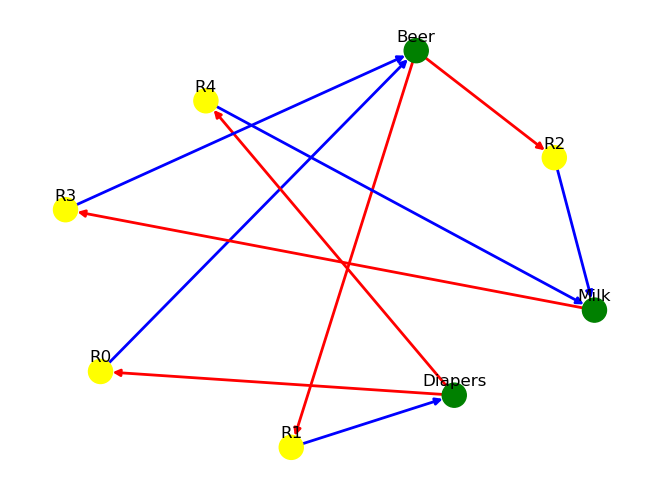

In [29]:
# Plot the rules
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    color_map = []
    for i in range(rules_to_show):
        G.add_nodes_from(["R"+str(i)])
        
        for antecedents in rules.iloc[i]['antecedents']:
            G.add_nodes_from([antecedents])
            G.add_edge(antecedents, "R"+str(i), color='r', weight=2)
        
        for consequents in rules.iloc[i]['consequents']:
            G.add_nodes_from([consequents])
            G.add_edge("R"+str(i), consequents, color='b', weight=2)
    
    for node in G:
        found_a_string = False
        for item in rules['antecedents'].values:
            if node in item:
                found_a_string = True
        for item in rules['consequents'].values:
            if node in item:
                found_a_string = True
        if not found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')  
    
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    
    pos = nx.spring_layout(G, k=16, scale=1)
    nx.draw(G, pos, edge_color=colors, width=weights, node_color=color_map, with_labels=False)
    
    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G, pos)
    plt.show()

draw_graph(rules, 5)

### Metrics Explanation

The Apriori algorithm generates frequent itemsets and association rules based on the following metrics:

- **Support**: Indicates how frequently the itemset appears in the dataset. Higher support means the itemset is more frequent.
- **Confidence**: Measures the reliability of the rule. Higher confidence means the antecedent frequently leads to the consequent.
- **Lift**: Indicates the strength of the rule over random co-occurrence. A lift greater than 1 implies a strong positive association, while a lift less than 1 implies a negative association.

### Interpreting the Metrics and Rules

- **Support**: A high support value means the itemset is common in the dataset. For example, if the support of `{Milk, Bread}` is 0.6, it means 60% of the transactions contain both Milk and Bread.
- **Confidence**: A high confidence value means that if the antecedent occurs, the consequent is likely to occur as well. For example, if the confidence of `Milk → Bread` is 0.8, it means 80% of the transactions that contain Milk also contain Bread.
- **Lift**: A lift value greater than 1 indicates a positive correlation between the antecedent and consequent, meaning they occur together more frequently than expected by chance. For example, if the lift of `Milk → Bread` is 1.2, it means Milk and Bread are 20% more likely to be bought together than if they were independent.

### Example Context

Let's consider a retail store analyzing customer transactions to identify product associations. By applying the Apriori algorithm, the store can find frequent itemsets like `{Milk, Bread}` and generate rules such as `Milk → Bread` with high support, confidence, and lift values. This information can be used to optimize product placement, design promotional offers, and improve inventory management.

The Apriori algorithm helps the store uncover hidden patterns in customer purchasing behavior, leading to better business decisions and increased sales.
